## Subway EDA

In [1]:
# 3rd Party Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from pathlib import Path
from shapely import wkt
from shapely.geometry import Point


# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
current_dir = Path.cwd()
parent_dir = current_dir.parent

combined = pd.read_csv(parent_dir / "2_data_cleaning" / "cleaned_csv" / "combined_data.csv")
subway = gpd.read_file(parent_dir / "2_data_cleaning" / "cleaned_csv" / "ttc_cleaned.csv")
subway = gpd.GeoDataFrame(subway, geometry=gpd.GeoSeries.from_wkt(subway['geometry']), crs="EPSG:4326")

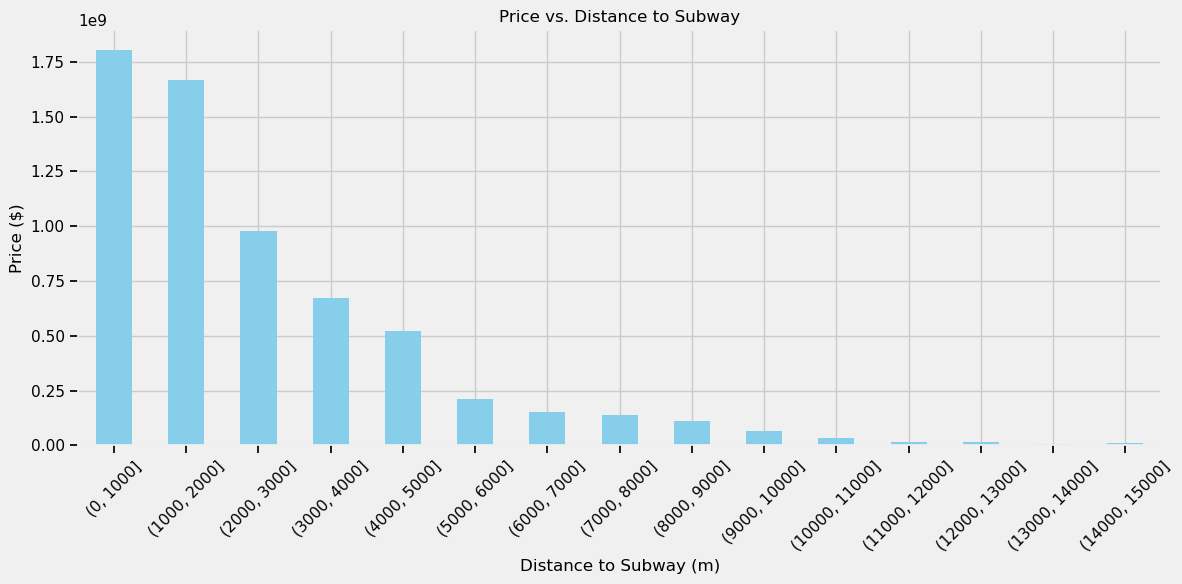

In [ ]:
# distance to subway vs price
bins = range(int(combined['distance_to_subway'].min()), int(combined['distance_to_subway'].max()) + 1000, 1000)
combined['Dist Binned'] = pd.cut(combined['distance_to_subway'], bins)

temp_rides_binned = combined.groupby('Dist Binned')['price'].sum()

plt.figure(figsize=(12, 6))
temp_rides_binned.plot(kind = 'bar', color='skyblue')

plt.xlabel('Distance to Subway (m)')
plt.ylabel('Price ($)')
plt.title('Price vs. Distance to Subway')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

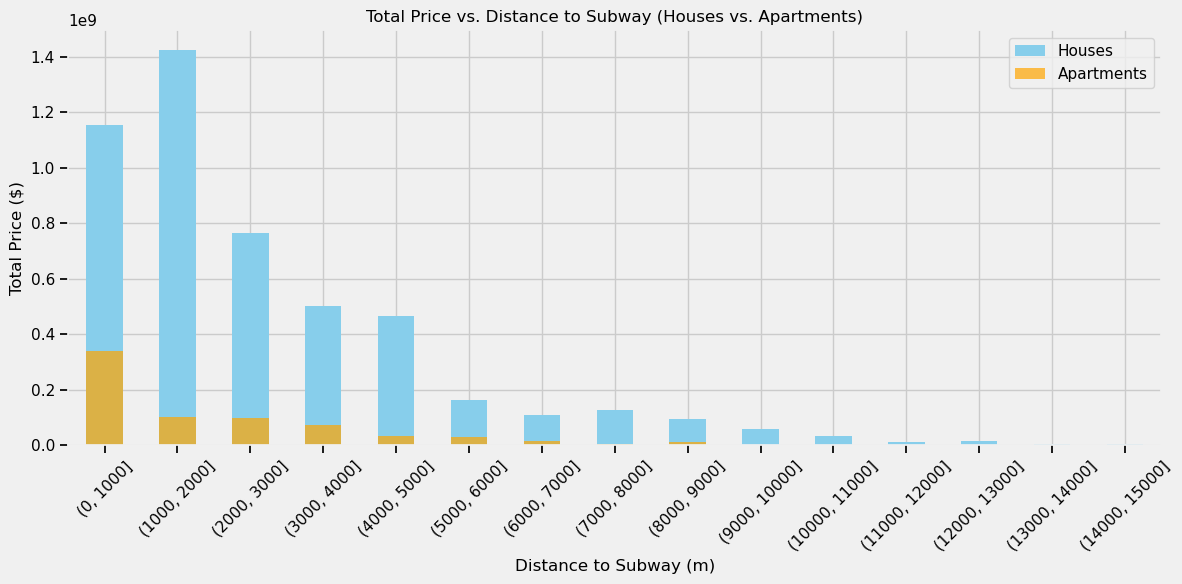

In [ ]:
# distance to subway vs price by building type

houses = combined[combined['Building Type'].isin([
    'Detached', 'Row / Townhouse', 'Semi-detached', 'Att/Row/Twnhouse', 
    'Duplex', 'Triplex', 'Multiplex', 'Freehold Townhouse', 'Link'
])]

apartments = combined[combined['Building Type'].isin([
    'Condo Apt', 'Condo/Apt Unit'
])]

bins = range(int(combined['distance_to_subway'].min()), int(combined['distance_to_subway'].max()) + 1000, 1000)

houses['Dist Binned'] = pd.cut(houses['distance_to_subway'], bins)
apartments['Dist Binned'] = pd.cut(apartments['distance_to_subway'], bins)

houses_binned = houses.groupby('Dist Binned')['price'].sum()
apartments_binned = apartments.groupby('Dist Binned')['price'].sum()

plt.figure(figsize=(12, 6))

houses_binned.plot(kind='bar', color='skyblue', label='Houses')
apartments_binned.plot(kind='bar', color='orange', label='Apartments', alpha=0.7)

plt.xlabel('Distance to Subway (m)')
plt.ylabel('Total Price ($)')
plt.title('Total Price vs. Distance to Subway (Houses vs. Apartments)')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()